#### pre-requisites for all models:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
mnist_train_dataset_initial = pd.read_csv('/home/MNIST_train.csv')

In [5]:
mnist_train_dataset_initial

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
null_list = mnist_train_dataset_initial.isna().sum()

In [7]:
null_list

Unnamed: 0    0
index         0
labels        0
0             0
1             0
             ..
779           0
780           0
781           0
782           0
783           0
Length: 787, dtype: int64

In [8]:
mnist_train_dataset_initial.columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

####removing the unnamed column and setting index correctly

In [9]:
mnist_train_dataset_initial = mnist_train_dataset_initial.drop('Unnamed: 0',axis =1)

In [10]:
mnist_train_dataset_initial.set_index('index',inplace=True)

In [11]:
mnist_train_dataset_initial.columns

Index(['labels', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=785)

####visualizing one row data as image

In [12]:
np_row = mnist_train_dataset_initial.iloc[2,1:].to_numpy()

In [13]:
np_row_final =np_row.reshape(28,28)

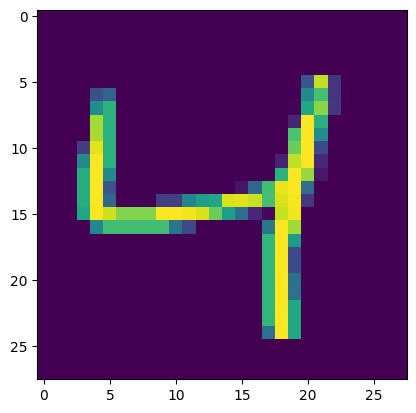

In [14]:
plt.imshow(np_row_final)

Storing the values of X and y for our modelling

In [15]:
mnist_train_dataset_initial.loc[:,'0':]

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
last_row = mnist_train_dataset_initial[59999:]

In [17]:
last_row.isna().sum()

labels    0
0         0
1         0
2         0
3         0
         ..
779       0
780       0
781       0
782       0
783       0
Length: 785, dtype: int64

in last row of dataset 751 are null values so we drop the row from dataframe

In [18]:
'''
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
'''

'\nplt.figure(figsize=(10,7))\ny_actu = pd.Series(y, name=\'Actual\')\ny_pred = pd.Series(y_hat, name=\'Predicted\')\ncm = pd.crosstab(y_actu, y_pred)\nax = sns.heatmap(cm, annot=True, fmt="d")\nplt.ylabel(\'True label\')\nplt.xlabel(\'Predicted label\')\n'

In [19]:
last_row_index = mnist_train_dataset_initial.tail(1).index

In [20]:
mnist_train_dataset_initial.drop(last_row_index,inplace = True)

In [21]:
mnist_train_dataset_initial.isna().sum().sum()

0

####no more null values

##### Now we separate the dependent and independent variables in two different numpy arrays so that we can feed the train numpy array to the model and check the predicted y values against the actual y values

In [22]:
X_train_independent_var_dataset = mnist_train_dataset_initial.loc[:,'0':]

In [23]:
y_train_digit_dependent_var= mnist_train_dataset_initial.loc[:,'labels']

In [24]:
y_train_digit_dependent_var

index
0        5
1        0
2        4
3        1
4        9
        ..
59994    1
59995    8
59996    3
59997    5
59998    6
Name: labels, Length: 59999, dtype: int64

In [25]:
X_train_independent_var_dataset.shape

(59999, 784)

In [26]:
y_train_digit_dependent_var.shape

(59999,)

In [27]:
X_train_independent_var_dataset = X_train_independent_var_dataset.to_numpy()
y_train_digit_dependent_var = y_train_digit_dependent_var.to_numpy()

In [28]:
X_train_independent_var_dataset

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
y_train_digit_dependent_var

array([5, 0, 4, ..., 3, 5, 6])

In [30]:
X_train_independent_var_dataset.shape[0]

59999

#####Scaling the X_train dataset

In [31]:
# basic formula :
'''
x_hat = x_xMIN
----------------
X_max - X_min
'''

'\nx_hat = x_xMIN\n----------------\nX_max - X_min\n'

In [32]:
X_train_independent_var_scaled_dataset = (X_train_independent_var_dataset -(X_train_independent_var_dataset.min()))/(X_train_independent_var_dataset.max()-X_train_independent_var_dataset.min())

#### writing the class for model building

#### 1st Naive Bayes Model

In [33]:
from scipy.stats import multivariate_normal as mvn

In [48]:
class MnistNaiveBayes:
  def __init__(self,likelihoods = dict(), priors = dict(),epsilon=1e-3):
    self.likelihoods = likelihoods
    self.priors = priors
    self.epsilon = epsilon


  def fit(self,X_train_independent_var_dataset,y_train_digit_dependent_var):
    self.unique_digits = set(y_train_digit_dependent_var.astype(int))
    for single_digit in self.unique_digits:
      X_for_single_digit = X_train_independent_var_dataset[y_train_digit_dependent_var==single_digit,:]
      self.likelihoods[single_digit]={"mean":X_for_single_digit.mean(axis=0),
                                      "cov":X_for_single_digit.var(axis=0)+self.epsilon}
      self.priors[single_digit]=len(X_for_single_digit)/len(X_train_independent_var_dataset)

  def predict(self,X_test_dataset):
    rows_of_dataset = X_test_dataset.shape[0]
    columns_of_dataset = X_test_dataset.shape[1]
    # creating a zero based array which will be filled later with actual probablity values which
    # our method calculates
    Probablity_values_array = np.zeros(shape = (rows_of_dataset,len(self.unique_digits)))
    for digit_under_consideration,result_array_for_digit in self.likelihoods.items():
      Probablity_values_array[:,digit_under_consideration] =       mvn.logpdf(X_test_dataset,result_array_for_digit['mean'],result_array_for_digit['cov'])
      + np.log(self.priors[digit_under_consideration])

    return Probablity_values_array.argmax(axis=1)




#### Test Data needs to be imported here now and some cleaning needs to be done on that

In [35]:
mnist_test_dataset = pd.read_csv('/home/MNIST_test.csv')

In [36]:
mnist_test_dataset

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
mnist_test_dataset = mnist_test_dataset.drop('Unnamed: 0',axis =1)

In [38]:
mnist_test_dataset.set_index('index',inplace=True)

as we can see there are no null values in test set

In [39]:
mnist_test_dataset.isna().sum().sum()

0

In [40]:
X_test_independent_var_dataset = mnist_test_dataset.loc[:,'0':]

In [41]:
y_test_digit_dependent_var = mnist_test_dataset.loc[:,'labels']

In [42]:
X_test_independent_var_dataset.shape

(10000, 784)

####scaling the test dataset

In [43]:
X_test_independent_var_dataset = X_test_independent_var_dataset.to_numpy()

In [44]:
X_test_independent_var_scaled_dataset=(X_test_independent_var_dataset-X_test_independent_var_dataset.min())/(X_test_independent_var_dataset.max()-X_test_independent_var_dataset.min())

In [45]:
X_test_independent_var_scaled_dataset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

####creating the instance for naive bayes class

In [49]:
mnist_naive_bayes_instance = MnistNaiveBayes()
mnist_naive_bayes_instance.fit(X_train_independent_var_dataset = X_train_independent_var_scaled_dataset,y_train_digit_dependent_var = y_train_digit_dependent_var)

##### testing with train set data

In [50]:
digit_predicted_value_for_train_set = mnist_naive_bayes_instance.predict(X_test_dataset=X_train_independent_var_scaled_dataset)

##### testing with the actual test set data

In [51]:
digit_predicted_value_for_test_set = mnist_naive_bayes_instance.predict(X_test_dataset=X_test_independent_var_scaled_dataset)

In [52]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

##### accuracy with train set

In [53]:
accuracy(y_train_digit_dependent_var,digit_predicted_value_for_train_set)

0.768262804380073

##### accuracy with test set

In [54]:
accuracy(y_test_digit_dependent_var,digit_predicted_value_for_test_set)

0.7746

##### Second instance with different value of epsilon to test accuracy

In [55]:
mnist_naive_bayes_instance_2 = MnistNaiveBayes(epsilon = 0.5)

In [56]:
mnist_naive_bayes_instance_2.fit(X_train_independent_var_dataset=X_train_independent_var_scaled_dataset,y_train_digit_dependent_var=y_train_digit_dependent_var)
digit_predicted_value_for_train_set_2 = mnist_naive_bayes_instance_2.predict(X_test_dataset=X_train_independent_var_scaled_dataset)
digit_predicted_value_for_test_set_2= mnist_naive_bayes_instance_2.predict(X_test_dataset=X_test_independent_var_scaled_dataset)
accuracy_for_train_set_2 = accuracy(y_train_digit_dependent_var,digit_predicted_value_for_train_set)
accuracy_for_test_set_2= accuracy(y_test_digit_dependent_var,digit_predicted_value_for_test_set)

In [57]:
accuracy_for_test_set_2

0.7746

In [58]:
accuracy_dict_naive_bayes = {}

In [59]:
possible_epsilon_values_naive_bayes = np.arange(0.0001,0.03,0.0005)

In [60]:

for epsilon_value in possible_epsilon_values_naive_bayes:
  current_instance = MnistNaiveBayes(epsilon = epsilon_value)
  # instances_list.append(current_instance)
  current_instance.fit(X_train_independent_var_dataset=X_train_independent_var_scaled_dataset,y_train_digit_dependent_var=y_train_digit_dependent_var)
  # gauss_bayes_digit_predicted_train_set = gauss_bayes_instance_3.gaussbayes_predict(X_train_independent_var_scaled_dataset)
  naive_bayes_digit_predicted_test_set = current_instance.predict(X_test_independent_var_scaled_dataset)
  accuracy_nb_testset = accuracy(naive_bayes_digit_predicted_test_set,y_test_digit_dependent_var)
  accuracy_dict_naive_bayes[current_instance] = [epsilon_value,accuracy_nb_testset]
  print(accuracy_dict_naive_bayes)

In [68]:
naive_bayes_accuracy_df = pd.DataFrame(accuracy_dict_naive_bayes.values())

In [75]:
naive_bayes_accuracy_df.rename(columns ={0:'epsilon value',1:'accuracy'},inplace = True)

<Axes: xlabel='epsilon value', ylabel='accuracy'>

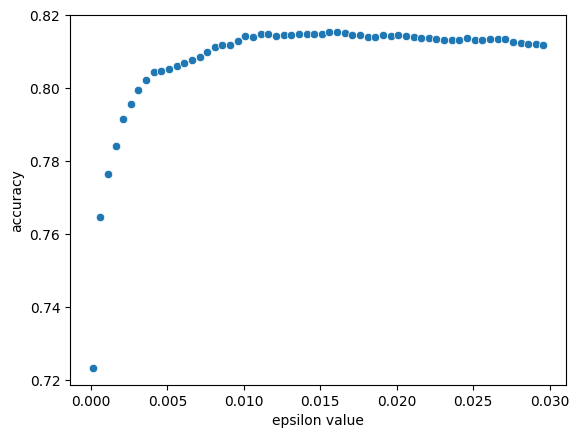

In [77]:
sns.scatterplot(data= naive_bayes_accuracy_df,x = 'epsilon value',y='accuracy' )

In [62]:
# so in case of Naive Bayes we can get maximum accuracy of 82.12 with epsilon value 0.0121

####2nd Gauss Bayes Model

Since we already have train dataset, test dataset ready we will write the class for GaussBayes directly

In [78]:
class MnistGaussBayes():
  def __init__(self,likelihoods=dict(),priors=dict(),epsilon=1e-3):
    self.likelihoods = likelihoods
    self.priors = priors
    self.epsilon = epsilon

  def gaussbayes_fit(self,X_train_independent_var_dataset,y_train_digit_dependent_var):
    self.unique_digits_in_labels = set(y_train_digit_dependent_var.astype(int))

    for single_digit in self.unique_digits_in_labels:
      X_for_single_digit = X_train_independent_var_dataset[y_train_digit_dependent_var==single_digit,:]
      row_count = X_for_single_digit.shape[0]
      column_count = X_for_single_digit.shape[1]
      mu_value_for_current_digit = X_for_single_digit.mean(axis=0)
      self.likelihoods[single_digit]={"mean":X_for_single_digit.mean(axis=0),"cov":(1/(row_count-1))*np.matmul((X_for_single_digit- mu_value_for_current_digit).T,X_for_single_digit-mu_value_for_current_digit) + self.epsilon*np.identity(column_count)}
      self.priors[single_digit] = len(X_for_single_digit)/len(X_train_independent_var_dataset)

  def gaussbayes_predict(self,X_test_dataset):
    test_dataset_rows_count = X_test_dataset.shape[0]
    test_dataset_column_count = X_test_dataset.shape[1]
    # initializing probablities value array
    self.probablities_value_array = np.zeros(shape = (test_dataset_rows_count,len(self.unique_digits_in_labels)))

    for digit_under_consideration ,result_array_for_digit in self.likelihoods.items():
      self.probablities_value_array[:,digit_under_consideration]=  mvn.logpdf(X_test_dataset,result_array_for_digit["mean"],result_array_for_digit["cov"]) + np.log(self.priors[digit_under_consideration])
    return self.probablities_value_array.argmax(axis = 1)




##### creating instance and fitting the model

In [79]:
gauss_bayes_instance_1 = MnistGaussBayes()

In [80]:
gauss_bayes_instance_1.gaussbayes_fit(X_train_independent_var_dataset=X_train_independent_var_scaled_dataset,y_train_digit_dependent_var=y_train_digit_dependent_var)
gauss_bayes_digit_predicted_train_set = gauss_bayes_instance_1.gaussbayes_predict(X_train_independent_var_scaled_dataset)
gauss_bayes_digit_predicted_test_set = gauss_bayes_instance_1.gaussbayes_predict(X_test_independent_var_scaled_dataset)
accuracy_gb_testset_1 = accuracy(gauss_bayes_digit_predicted_test_set,y_test_digit_dependent_var)

In [81]:
accuracy_gb_testset_1

0.9108

gaussbayes iteration 2: with epsilon different epsilon value

In [82]:
gauss_bayes_instance_2= MnistGaussBayes(epsilon = 0.005)

In [83]:
gauss_bayes_instance_2.gaussbayes_fit(X_train_independent_var_dataset=X_train_independent_var_scaled_dataset,y_train_digit_dependent_var=y_train_digit_dependent_var)
gauss_bayes_digit_predicted_train_set = gauss_bayes_instance_2.gaussbayes_predict(X_train_independent_var_scaled_dataset)
gauss_bayes_digit_predicted_test_set = gauss_bayes_instance_2.gaussbayes_predict(X_test_independent_var_scaled_dataset)
accuracy_gb_testset_2 = accuracy(gauss_bayes_digit_predicted_test_set,y_test_digit_dependent_var)
accuracy_gb_testset_2

KeyboardInterrupt: 

##### iteration 3

In [ ]:
gauss_bayes_instance_3=MnistGaussBayes(epsilon = 0.5)

In [ ]:
gauss_bayes_instance_3.gaussbayes_fit(X_train_independent_var_dataset=X_train_independent_var_scaled_dataset,y_train_digit_dependent_var=y_train_digit_dependent_var)
gauss_bayes_digit_predicted_train_set = gauss_bayes_instance_3.gaussbayes_predict(X_train_independent_var_scaled_dataset)
gauss_bayes_digit_predicted_test_set = gauss_bayes_instance_3.gaussbayes_predict(X_test_independent_var_scaled_dataset)
accuracy_gb_testset_3 = accuracy(gauss_bayes_digit_predicted_test_set,y_test_digit_dependent_var)

In [ ]:
accuracy_gb_testset_3

In [90]:
possible_epsilon_values = np.arange(0.001,0.5,0.003)

In [91]:
accuracy_gauss_bayes_dict = dict()

In [92]:
for epsilon_value in possible_epsilon_values:
  current_instance = MnistGaussBayes(epsilon = epsilon_value)
  # instances_list.append(current_instance)
  current_instance.gaussbayes_fit(X_train_independent_var_dataset=X_train_independent_var_scaled_dataset,y_train_digit_dependent_var=y_train_digit_dependent_var)
  # gauss_bayes_digit_predicted_train_set = gauss_bayes_instance_3.gaussbayes_predict(X_train_independent_var_scaled_dataset)
  gauss_bayes_digit_predicted_test_set = current_instance.gaussbayes_predict(X_test_independent_var_scaled_dataset)
  accuracy_gb_testset = accuracy(gauss_bayes_digit_predicted_test_set,y_test_digit_dependent_var)
  accuracy_gauss_bayes_dict[epsilon_value] = accuracy_gb_testset
  print(accuracy_gauss_bayes_dict)

{0.001: 0.9108}
{0.001: 0.9108, 0.004: 0.9355}
{0.001: 0.9108, 0.004: 0.9355, 0.007: 0.9423}
{0.001: 0.9108, 0.004: 0.9355, 0.007: 0.9423, 0.010000000000000002: 0.9473}
{0.001: 0.9108, 0.004: 0.9355, 0.007: 0.9423, 0.010000000000000002: 0.9473, 0.013000000000000001: 0.9498}
{0.001: 0.9108, 0.004: 0.9355, 0.007: 0.9423, 0.010000000000000002: 0.9473, 0.013000000000000001: 0.9498, 0.016: 0.9516}
{0.001: 0.9108, 0.004: 0.9355, 0.007: 0.9423, 0.010000000000000002: 0.9473, 0.013000000000000001: 0.9498, 0.016: 0.9516, 0.019000000000000003: 0.953}
{0.001: 0.9108, 0.004: 0.9355, 0.007: 0.9423, 0.010000000000000002: 0.9473, 0.013000000000000001: 0.9498, 0.016: 0.9516, 0.019000000000000003: 0.953, 0.022000000000000002: 0.9546}
{0.001: 0.9108, 0.004: 0.9355, 0.007: 0.9423, 0.010000000000000002: 0.9473, 0.013000000000000001: 0.9498, 0.016: 0.9516, 0.019000000000000003: 0.953, 0.022000000000000002: 0.9546, 0.025: 0.9556}
{0.001: 0.9108, 0.004: 0.9355, 0.007: 0.9423, 0.010000000000000002: 0.9473, 0.0

In [95]:
accuracy_gauss_bayes_dict

{0.001: 0.9108,
 0.004: 0.9355,
 0.007: 0.9423,
 0.010000000000000002: 0.9473,
 0.013000000000000001: 0.9498,
 0.016: 0.9516,
 0.019000000000000003: 0.953,
 0.022000000000000002: 0.9546,
 0.025: 0.9556,
 0.028: 0.956,
 0.031: 0.9562,
 0.034: 0.9564,
 0.037000000000000005: 0.9564,
 0.04: 0.957,
 0.043000000000000003: 0.9571,
 0.046: 0.9565,
 0.049: 0.9564,
 0.052000000000000005: 0.9566,
 0.055: 0.9562,
 0.058: 0.9565,
 0.061: 0.9571,
 0.064: 0.9567,
 0.067: 0.9566,
 0.07: 0.9563,
 0.07300000000000001: 0.9562,
 0.076: 0.9563,
 0.079: 0.9562,
 0.082: 0.9563,
 0.085: 0.9562,
 0.08800000000000001: 0.9558,
 0.091: 0.9555,
 0.094: 0.9552,
 0.097: 0.9545,
 0.1: 0.9542,
 0.10300000000000001: 0.9536,
 0.106: 0.9531,
 0.109: 0.9527,
 0.112: 0.9525,
 0.115: 0.9524,
 0.11800000000000001: 0.9522,
 0.121: 0.9517,
 0.124: 0.9511,
 0.127: 0.9507,
 0.13: 0.9503,
 0.133: 0.9505,
 0.136: 0.9504,
 0.139: 0.95,
 0.14200000000000002: 0.9499,
 0.14500000000000002: 0.9495,
 0.148: 0.9494,
 0.151: 0.9492,
 0.15

In [96]:
accuracy_gauss_bayes_df = pd.DataFrame(accuracy_gauss_bayes_dict.keys(),accuracy_gauss_bayes_dict.values())

In [105]:
accuracy_gauss_bayes_df.rename(columns = {0:'epsilon_value'},inplace = True)

In [106]:
accuracy_gauss_bayes_df

,accuracy,epsilon_value
0,0.9108,0.001
1,0.9355,0.004
2,0.9423,0.007
3,0.9473,0.010
4,0.9498,0.013
...,...,...
162,0.9216,0.487
163,0.9212,0.490
164,0.9210,0.493
165,0.9207,0.496


In [100]:
accuracy_gauss_bayes_df.reset_index(names = 'accuracy',inplace= True)

<Axes: xlabel='epsilon_value', ylabel='accuracy'>

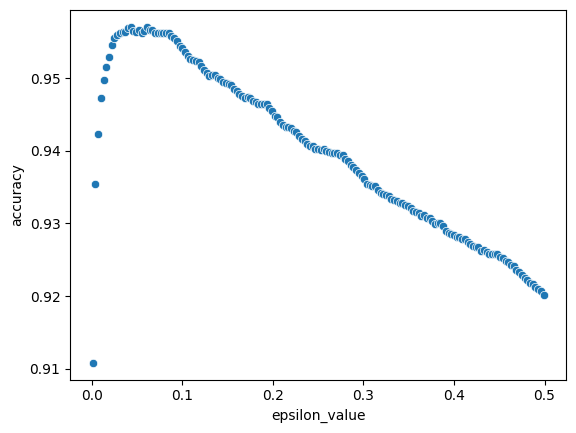

In [107]:
sns.scatterplot(data = accuracy_gauss_bayes_df,x='epsilon_value',y='accuracy')

##### after trying the above combinations we deduce that best accuracy = 95.69 with epsilon value : 0.065

In [ ]:
final_gauss_bayes_instance = MnistGaussBayes(epsilon = 0.064)
final_gauss_bayes_instance.gaussbayes_fit(X_train_independent_var_dataset=X_train_independent_var_scaled_dataset,y_train_digit_dependent_var=y_train_digit_dependent_var)
gauss_bayes_digit_predicted_train_set = final_gauss_bayes_instance.gaussbayes_predict(X_train_independent_var_scaled_dataset)
gauss_bayes_digit_predicted_test_set = final_gauss_bayes_instance.gaussbayes_predict(X_test_independent_var_scaled_dataset)
accuracy_gb_testset_final = accuracy(gauss_bayes_digit_predicted_test_set,y_test_digit_dependent_var)
accuracy_gb_testset_final

#### KNN means nearest neighbour

In [108]:
class KMeansNearestNeighbour():
  def k_means_fit(self,X_train_independent_var_dataset,y_train_digit_dependent_var,
                  epsilon = 1e-3):
    self.X_train_independent_var_dataset = X_train_independent_var_dataset
    self.y_train_digit_dependent_var = y_train_digit_dependent_var
    self.epsilon = epsilon

  def k_means_predict(self,X_test_independent_var_dataset,number_of_neighbours_K):
    length_of_test_dataset = len(X_test_independent_var_dataset)
    probablities_array = np.zeros(length_of_test_dataset)

    for single_value in range(length_of_test_dataset):
      distance = np.sum((self.X_train_independent_var_dataset-X_test_independent_var_dataset[single_value])**2,axis = 1)
      idxt = np.argsort(distance)[:number_of_neighbours_K]
      gamma_k = 1/(np.sqrt(distance[idxt]+ self.epsilon))
      probablities_array[single_value] = np.bincount(self.y_train_digit_dependent_var[idxt],weights = gamma_k).argmax()
    return probablities_array




we have the test data and train data so we can run the model right away

In [109]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [110]:
knn_instance_1 = KMeansNearestNeighbour()
knn_instance_1.k_means_fit(X_train_independent_var_scaled_dataset,y_train_digit_dependent_var)

digit_predicted_knn_1 = knn_instance_1.k_means_predict(X_test_independent_var_scaled_dataset,number_of_neighbours_K=1000)
print('.')
# digit_predicted_knn_for_train_data = knn_instance_1.k_means_predict(X_train_independent_var_scaled_dataset,number_of_neighbours_K = 50)

.


In [67]:
accuracy(digit_predicted_knn_1,y_test_digit_dependent_var)

0.8788

In [ ]:
accuracy(digit_predicted_knn_for_train_data,y_train_digit_dependent_var)

NameError: name 'digit_predicted_knn_for_train_data' is not defined

In [73]:
dictionary_for_k_means = {}

In [74]:
values_of_K = np.arange(500,8000,50)

In [75]:
current_instance = KMeansNearestNeighbour()
current_instance.k_means_fit(X_train_independent_var_scaled_dataset,y_train_digit_dependent_var)
for K in values_of_K:
  # current_instance = KMeansNearestNeighbour()
  # current_instance.k_means_fit(X_train_independent_var_scaled_dataset,y_train_digit_dependent_var)
  digit_predicted_by_current_instance_knn = current_instance.k_means_predict(X_test_independent_var_scaled_dataset,number_of_neighbours_K=K)
  accuracy_value = accuracy(digit_predicted_by_current_instance_knn,y_test_digit_dependent_var)
  dictionary_for_k_means[K]=[accuracy_value]
  print(f'dictionary so far: {dictionary_for_k_means}')


dictionary so far: {500: [0.9064]}
dictionary so far: {500: [0.9064], 550: [0.9036]}


KeyboardInterrupt: 

In [78]:
small_values_of_K = np.arange(20,8000,50)

In [77]:
dictionary_for_k_means_small = {}

In [80]:
for K in small_values_of_K:
  current_instance = KMeansNearestNeighbour()
  current_instance.k_means_fit(X_train_independent_var_scaled_dataset,y_train_digit_dependent_var)
  digit_predicted_by_current_instance_knn = current_instance.k_means_predict(X_test_independent_var_scaled_dataset,number_of_neighbours_K=K)
  accuracy_value = accuracy(digit_predicted_by_current_instance_knn,y_test_digit_dependent_var)
  dictionary_for_k_means_small[K]=[accuracy_value]
  print(f'dictionary so far: {dictionary_for_k_means_small}')


dictionary so far: {20: [0.9633]}
dictionary so far: {20: [0.9633], 70: [0.9502]}
dictionary so far: {20: [0.9633], 70: [0.9502], 120: [0.9413]}


KeyboardInterrupt: 

so we got maximum accuracy for K = 20 now for k = 20 we will check epsilon values

In [84]:
K_small_values= [15,25,30]

In [85]:
for K in K_small_values:
  current_instance = KMeansNearestNeighbour()
  current_instance.k_means_fit(X_train_independent_var_scaled_dataset,y_train_digit_dependent_var)
  digit_predicted_by_current_instance_knn = current_instance.k_means_predict(X_test_independent_var_scaled_dataset,number_of_neighbours_K=K)
  accuracy_value = accuracy(digit_predicted_by_current_instance_knn,y_test_digit_dependent_var)
  dictionary_for_k_means_small[K]=[accuracy_value]
  print(f'dictionary so far: {dictionary_for_k_means_small}')

dictionary so far: {20: [0.9633], 70: [0.9502], 120: [0.9413], 15: [0.9647]}
dictionary so far: {20: [0.9633], 70: [0.9502], 120: [0.9413], 15: [0.9647], 25: [0.9612]}
dictionary so far: {20: [0.9633], 70: [0.9502], 120: [0.9413], 15: [0.9647], 25: [0.9612], 30: [0.9604]}


In [86]:
# maximum accuracy so far is for K = 25 , accuracy -- 96.04

In [ ]:
for K in [24,26,27]:
  current_instance = KMeansNearestNeighbour()
  current_instance.k_means_fit(X_train_independent_var_scaled_dataset,y_train_digit_dependent_var)
  digit_predicted_by_current_instance_knn = current_instance.k_means_predict(X_test_independent_var_scaled_dataset,number_of_neighbours_K=K)
  accuracy_value = accuracy(digit_predicted_by_current_instance_knn,y_test_digit_dependent_var)
  dictionary_for_k_means_small[K]=[accuracy_value]
  print(f'dictionary so far: {dictionary_for_k_means_small}')